# Data

In [ ]:
print(head(cars))
plot(dist ~ speed, cars)

# Linear regression

In [ ]:
model <- lm(dist ~ speed, cars)
summary(model)

In [ ]:
plot(dist ~ speed, cars)
abline(model, col = 'red')

# MSE

In [ ]:
yhat <- predict(model)

In [ ]:
plot(yhat ~ cars$dist)
abline(a = 0, b = 1, col = 'red')

In [ ]:
MSE <- sum((cars$dist - yhat) ^ 2) / nrow(cars)
print(MSE)

In [ ]:
NormEquation <- function(x, y){
  require(MASS)
  x <- cbind(rep(1,nrow(x)), x)
  ntheta <- ginv(t(x) %*% x) %*% t(x) %*% y
  return(ntheta)
}

In [ ]:
NormEquation(as.matrix(cars$speed), as.matrix(cars$dist))

# btw...

In [ ]:
Rsquared <- 1 - ((sum((cars$dist - yhat) ^ 2)) / sum((cars$dist - mean(cars$dist)) ^ 2))
print(Rsquared)

# Descente de gradient

In [57]:
# Building the model
m <- 0
c <- 0
X <- cars$speed
Y <- cars$dist
n <- nrow(cars)

L = 0.001  # The learning Rate
epochs <- 50000  # The number of iterations to perform gradient descent

hist <- data.frame()

# Performing Gradient Descent 
for (i in c(1 : epochs)) {
    yhat = m*X + c  # The current predicted value of Y
    Dm = (-2/n) * sum(X * (Y - yhat))  # dérivée partielle de la fonction de coût par rapport à m
    Dc = (-2/n) * sum(Y - yhat)  # dérivée partielle de la fonction de coût par rapport à c
    m = m - L * Dm  # Update m
    c = c - L * Dc  # Update c
    df <- data.frame(m,c)
    hist <- rbind(hist,df)
}

print(m)
print(c)

##https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

[1] 3.932375
[1] -17.57851


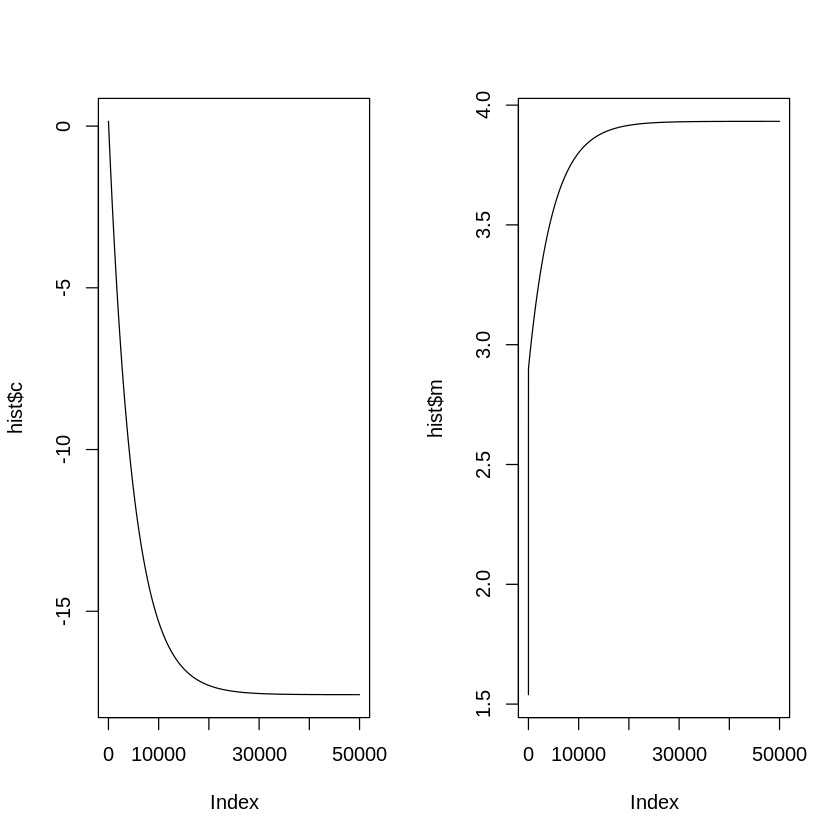

In [58]:
par(mfrow = c(1,2))
plot(hist$c, type = 'l')
plot(hist$m, type = 'l')